# PC-Lab 7: Linear basis functions and kernels

In this PC-lab, we will have a look at two particular strategies in order to be able to analyze non-linear relationships in data: _linear basis functions expansion_ and _kernels_. 

We will first have a look at basis functions. Next we will turn a logistic regression model to a kernel logistic regression model ourselves. Finally we will study kernel ridge regression on a real-world dataset, where we will predict the compressive strength of concrete based on its composition and age. 


## Introduction: From Linearity to Non-Linearity

Imagine trying to fit a straight line to predict the wage of (commonly educated) people based on their age. This can be a simple linear regression problem, and in many cases, a straight line might do a good job. But what if the relationship isn’t strictly linear? What if the wage suddenly skyrockets after reaching a certain age, or has some other complex, non-linear behavior?

This is where linear basis function models come into play. Instead of trying to fit our data using just a line, we transform our input data into a new space, making it easier to fit with a linear model. For example, we might convert our single size feature into multiple features like size, size squared, and size cubed. This way, even though our model is still "linear" in its parameters, it can capture non-linear relationships in the original feature space.

Now, you might ask: how do we decide on these transformations? How many should we use? Isn't there a smarter way to capture these non-linear relationships without having to manually craft these transformations?

Enter kernel methods. Instead of explicitly transforming our data, kernel methods allow us to implicitly operate in a high-dimensional space, enabling us to fit complex relationships without ever leaving the comfort of our linear models. In essence, a kernel is a function that computes the "similarity" between data points. This concept unlocks the potential to work with infinite-dimensional spaces and even handle problems where the relationship between inputs and outputs is highly intricate.

<img src="https://upload.wikimedia.org/wikipedia/en/c/ce/Cps71_lc_mean.png" width=400>

<em>Example of a fitted kernel regression function, see [KernelRegression](https://en.wikipedia.org/wiki/Kernel_regression) </em>

## Basis functions

When trying to solve a binary classification problem, classifiers usually try to separate the positive from the negative class. Often, linear models are not capable of making this separation. An option to deal with this problem is to find an (extended) basis in which the classes are (almost) linearly separable. 

As an example, consider the binary classification problem in the figure below. The data depicted in this figure originates from a(n) (unknown) joint distribution, for which the Bayes-optimal decision boundary (in case of the 0/1 loss) is a circle. It is clear that the classes are not linearly separable in the original feature space (which is $\mathbb{R}^2$). An option is to extend this space using a set of (non-) linear functions $$\phi_1, ... , \phi_m: \mathbb{R}^2 \rightarrow \mathbb{R}^d. $$ 

Note that the identity map can also be chosen for $\phi_i$. Using these transformations, the representation of an instance $\mathbf{x_i} = (x_{i,1},x_{i,2})$ becomes $$(x_{i,1},x_{i,2}) \rightarrow \phi_1(x_{i,1},x_{i,2}),..., \phi_M(x_{i,1},x_{i,2}) := \tilde{x}$$,
and the model is then fitted on the transformed $\tilde{x}$.

The basis functions are herbey fixed and known. Examples are
- $\phi_j(x_i) = x_i^j \quad \forall j = 1, \dots, m$ (e.g. for polynomial regression)
- $\phi_j(x_i) = \mathbb{I}(c_j < x_i < c_{j+1}$ (for piecewise constant functions)
- $\phi_j(x_i) = \exp (- \frac{x_i - \mu_j}{2 \sigma^2})$ (radial basis functions)

<div class="alert alert-success">
<h1>EXERCISE 7.1 (warm-up)</h2>
<p><b>
*  Generate a dataset according to the code that is given. Have a look at the documentation 
<a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html" target="_top">here</a>
<br>
*  Which feature(s) would you construct (using a transformation as described above) in order to separate these two classes? 
<br>
*  Use logistic regression in order to make sure your features are working (make sure you evaluate the performance on a separate test set). In other words, fit a logistic regression model on both the original features and your new features. What's the difference in accuracy between the two? </p> </b>
</div>

In [1]:
##1a: 
import urllib.request
import numpy as np
from sklearn.datasets import make_circles
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd


%matplotlib inline

plt.style.use('seaborn-v0_8')

1. plot the training data:

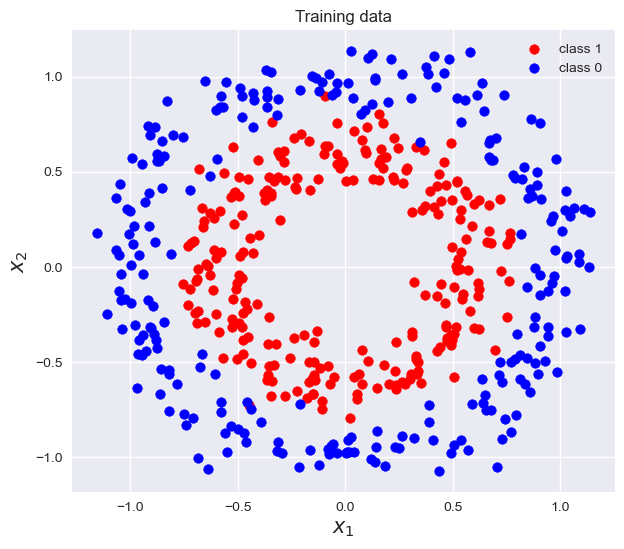

In [2]:
circles_train, labels_train = make_circles(n_samples=500, noise=0.1, factor=0.6, random_state=23)
circles_test, labels_test = make_circles(n_samples=500, noise=0.1, factor=0.6, random_state=85)

# visualize points with labl 0 as blue
blues = labels_train == 0
# visualize points with labl 1 as red
reds = labels_train == 1

fig, ax = plt.subplots(figsize=(7,6))
ax.scatter(circles_train[reds,0],circles_train[reds,1], c='r', label="class 1")
ax.scatter(circles_train[blues,0],circles_train[blues,1], c='b', label="class 0")
ax.set_xlabel(r'$x_1$', size=15)
ax.set_ylabel(r'$x_2$', size=15)
plt.title('Training data')
plt.legend()
plt.show()

2. What (new) feature makes sense to use as a classification criterion? Construct the new feature and save it as the new train/test data.

In [3]:
##1b: 
# construct new features using a transformation of the original features
circles_train_new = circles_train[:, 0]**2 + circles_train[:, 1]**2
circles_test_new = circles_test[:, 0]**2 + circles_test[:, 1]**2

3. Use the scikit-learn class [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to fit a Logistic Regression Model on the (original) train data. Make predictions on the test data and calculate the accuracy. 
For visuaization purposes, evaluate the model on the provided grip points also, and visulize the prediction boundary using the given code.

Accuracy original features: 0.51


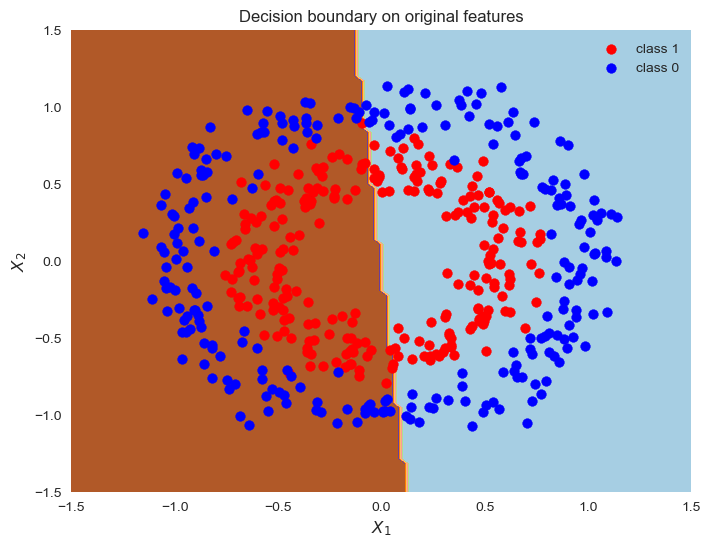

In [4]:
##1c: 

mesh_x1, mesh_x2 = np.meshgrid(np.linspace(-1.5,1.5,100),np.linspace(-1.5,1.5,100))
grid = np.asarray([[x1,x2] for x1,x2 in zip(mesh_x1.ravel(), mesh_x2.ravel())])

#Fit logistic regression: 
lr = LogisticRegression()
# fit it first to the original training data
lr.fit(circles_train, labels_train)
# predict on the original test data
preds_orig = lr.predict(circles_test)
# compute accuracy
acc_before = accuracy_score(labels_test, preds_orig)
print('Accuracy original features: ' + str(acc_before))

# compute predictions for the grid
Z = lr.predict(grid)
# reshape to the shape of the grid
Z = Z.reshape(mesh_x1.shape)


fig, ax = plt.subplots(figsize=(8,6))
ax.contourf(mesh_x1, mesh_x2, Z, cmap=plt.cm.Paired)
ax.scatter(circles_train[reds,0],circles_train[reds,1], c='red', label="class 1");
ax.scatter(circles_train[blues,0],circles_train[blues,1], c='blue', label="class 0");
ax.set_xlabel(r'$X_1$', size=12)
ax.set_ylabel(r'$X_2$', size=12)
plt.title('Decision boundary on original features')
plt.legend()
plt.show()


4. Now do the same for the new train and test data (accuracy and plotting of decision boundary)!

Accuracy new features: 0.958


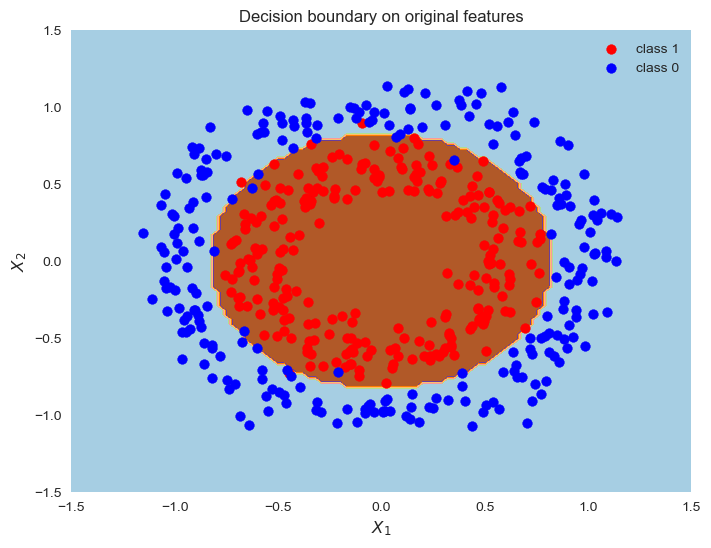

In [5]:

#Fit logistic regression: 
lr = LogisticRegression()
lr.fit(circles_train_new.reshape(-1,1), labels_train)
preds_new = lr.predict(circles_test_new.reshape(-1,1))
acc_after = accuracy_score(labels_test, preds_new)
print('Accuracy new features: ' + str(acc_after))

# transform the grid using the same transformation as for the features
grid_new = grid[:, 0]**2 + grid[:, 1]**2
# predictions on grid:
Z = lr.predict(grid_new.reshape(-1,1))
# reshape to the shape of the grid  
Z = Z.reshape(mesh_x1.shape)

#plot
fig, ax = plt.subplots(figsize=(8,6))
ax.contourf(mesh_x1, mesh_x2, Z, cmap=plt.cm.Paired)
ax.scatter(circles_train[reds,0],circles_train[reds,1], c='red', label="class 1");
ax.scatter(circles_train[blues,0],circles_train[blues,1], c='blue', label="class 0");
ax.set_xlabel(r'$X_1$', size=12)
ax.set_ylabel(r'$X_2$', size=12)
plt.title('Decision boundary on original features')
plt.legend()
plt.show()




# Kernels

Having explored **linear basis function models**, we recognized their power in capturing non-linear relationships by transforming our input space into higher dimensions. The crux of such an approach lies in the choice and design of the transformation: how do we choose the right basis functions, and how many of them should we use?

Here's where **kernels** present an elegant solution.
At their core, kernels offer a clever mathematical trick. Rather than explicitly mapping our input data to a high-dimensional space (as we do with basis functions), kernels allow us to compute the inner products between vectors in this high-dimensional space without ever actually going there.

Formally, a kernel is a function $k: \mathcal{X} \times \mathcal{X} \rightarrow \mathbb{R}$ defined as $$k(\boldsymbol{x}_i, \boldsymbol{x}_j) = \langle \Phi(\mathbf{x_i}), \Phi(\mathbf{x_j}') \rangle $$
Where
- $\boldsymbol{x_i}, \boldsymbol{x_j}$ are vectors in the input space $\mathcal{X}$ (ouer feature space, i.e. just pairs of input features)
- $ \langle \cdot, \cdot \rangle $ represents the inner product
- $ \Phi: \mathcal{X} \rightarrow \mathcal{F} $ is a mapping to a feature space $\mathcal{F}$, analogous to our basis functions


This is the brilliance of kernels: they provide an implicit bridge between our input space and a feature-rich space where linear patterns emerge from non-linear relationships.

The most simple kernel is the **linear kernel**, for which the kernel function looks as follows: 

\begin{equation}
k(\mathbf{x_i},\mathbf{x_j}) = \mathbf{x_i}^T\mathbf{x_j}. 
\end{equation}

Consider the following polynomical kernel function given by: 
\begin{equation}
k(\mathbf{x_i},\mathbf{x_j}) = (\mathbf{x_i}^T\mathbf{x_j})^2. 
\end{equation}

Let again be $\mathbf{x_i} = (x_{i,1},x_{i,2})$. Then we can give a simple illustration of the kernel trick by writing: 


\begin{align}
k(\mathbf{x_i},\mathbf{x_j}) &= (\mathbf{x_i}^T\mathbf{x_j})^2 = (x_{i,1}x_{j,1} + x_{i,2}x_{j,2})^2 \\
        &= x_{i,1}^2x_{j,1}^2 + x_{i,2}^2x_{j,2}^2 + 2x_{i,1}x_{j,1}x_{i,2}x_{j,2} \\
        &= (x_{i,1}^2, x_{i,2}^2, \sqrt{2} x_{i,1}x_{i,2})(x_{j,1}^2, x_{j,2}^2, \sqrt{2} x_{j,1}x_{j,2}) \\
        &= \phi(\mathbf{x_i})^T\phi(\mathbf{x_j}). 
\end{align}

This shows that the squared term of the dot product of vectors $\mathbf{x_i}$ and $\mathbf{x_j}$ is equivalent to the the product of the explicit feature mapping $\mathbf{\phi(x_i)}$ and $\mathbf{\phi(x_j)}$. 

Another popular kernel is the **Radial Basis Functions (RBF) kernel**. The feature space implied by this kernel is infinite-dimensional: 
\begin{align}
k(\mathbf{x_i},\mathbf{x_j}) = \exp\left(- \frac{||\mathbf{x_i}-\mathbf{x_j}||^2}{2\sigma^{2}} \right). 
\end{align}

Central to the concept of kernels is the **Kernel Matrix**, often termed the Gram matrix. Having a set of $n$ (train) instances $\boldsymbol{x_1}, \dots, \boldsymbol{x_n}$, it's an $n \times n$ matrix $K$ where each entry $K_{ij}$ is the kernel function computed between data points $\boldsymbol{x_i}$ and $\boldsymbol{x_j}$:
\begin{equation}
K = 
\begin{bmatrix}
    k(\mathbf{x_1},\mathbf{x_1}) & ... & k(\mathbf{x_1},\mathbf{x_n}) \\
    \vdots & & \vdots \\
    k(\mathbf{x_n},\mathbf{x_1}) & ... & k(\mathbf{x_n},\mathbf{x_n}) \\
\end{bmatrix}, 
\end{equation}
This matrix encapsulates all pairwise similarities between the data points in our dataset. It's pivotal in many kernel-based algorithms since it allows these methods to operate solely using the kernel values, bypassing the need to work explicitly in the high-dimensional feature space. By leveraging this matrix, algorithms like kernel SVM or kernel PCA can find decision boundaries or principal components, respectively, in transformed spaces without ever calculating the transformations directly.
 Once the model is fit, it can be
used to predict the labels of new instances uses a kernel matrix of the following form, for which test instances are denoted with a $*$: 
\begin{equation}
K^* = 
\begin{bmatrix}
    k(\mathbf{x_1}^*,\mathbf{x_1}) & ... & k(\mathbf{x_1}^*,\mathbf{x_n}) \\
    \vdots & & \vdots \\
    k(\mathbf{x_L}^*,\mathbf{x_1}) & ... & k(\mathbf{x_L}^*,\mathbf{x_n}) \\
\end{bmatrix}, 
\end{equation}

where we now have $L$ test instances. Using a kernel gives rise to a whole new scale of machine learning methods: 
- Support Vector Machines (next lab))
- Kernel Principal Component Analysis
- Kernel Logistic Regression (this lecture)
- Kernel Ridge Regression (this lecture)
- ....


<div class="alert alert-success">
<h1>EXERCISE 7.2 </h2>
<p><b>
* Implement the rbf-kernel and calculate the kernel matrix for the previous dataset. In other words, expand the dataset from the first exercise to the new 'kernel' space. (Tip: You can do this yourself, or use your beloved machine learning library <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise" target="_top"> scikit-learn</a>. 
<br>
* Fit a logistic regression model to the expanded features, using the kernel matrix. In this way, we are building our own kernel logistic regression model. What is the performance on the test set?
<br>
* Which other kernels might work for this dataset? 
 </b>
</div>

1. Use the Gaussian (RBF) kernel to compute the gram matrix on your train and test features. Remember that we want to use the pairwise distances from the test set to the train set for the prediction.

In [6]:
from sklearn.metrics.pairwise import rbf_kernel

K_train = rbf_kernel(circles_train, circles_train)
# calculate the kernel matrix for the test data
K_test = rbf_kernel(circles_test, circles_train)

Now fit a logistic regression model to the "expanded train features" and evaluate it on the "expanded test features":

In [7]:
##2b): 
#Fit a logistic regression model using the kernel matrix: 
lr = LogisticRegression(penalty="l2")
lr.fit(K_train, labels_train)
preds_kernel = lr.predict(K_test)
# compute accuracy
acc_kernel = accuracy_score(labels_test, preds_kernel)
print('Accuracy with kernel features: ' + str(acc_kernel))

Accuracy with kernel features: 0.96


Other option: Polynomial Kernel

In [8]:
# now with polynomial kernel
from sklearn.metrics.pairwise import polynomial_kernel

K_train = polynomial_kernel(circles_train, circles_train, degree=2)
# calculate the kernel matrix for the test data
K_test = polynomial_kernel(circles_test, circles_train, degree=2)

#Fit a logistic regression model using the kernel matrix:
lr = LogisticRegression(penalty="l2")
lr.fit(K_train, labels_train)
preds_kernel = lr.predict(K_test)
# compute accuracy
acc_kernel = accuracy_score(labels_test, preds_kernel)
print('Accuracy with kernel features: ' + str(acc_kernel))


Accuracy with kernel features: 0.96


**Why is the polynomial kernel also a valid option here?**

The _make_circles_ data, when visualized, appears as concentric circles. A linear decision boundary won't be able to separate the two classes. However, if we think about the equation of a circle, it's of the form: $$x^2 + y^2 = r^2$$
This equation is inherently quadratic. A polynomial kernel of degree 2, defined as $$k(\boldsymbol{x_i}, \boldsymbol{x_j}) = (c + \langle \boldsymbol{x_i}, \boldsymbol{x_j} \rangle)^2 $$ has the ability to capture quadratic relationships in the data.

## Kernel Ridge Regression

### Ridge Regression: A quick refresher

At its core, Ridge Regression is a regularized linear regression. The objective is to not just minimize the residuals, but also to keep the model weights (coefficients) small. As in the lecture:
$$\boldsymbol{w}^{ridge} = \arg\min_{\boldsymbol{w}} \sum_{i=1}^n (y_i - \sum_{j=0}^m w_jx_{i1}^j)^2 + \lambda \sum_{j=0}^m w_j^2$$
where 
- $\boldsymbol{w}$ is the weight vector of our model
- $\lambda$ is the regularization parameter.

### Extending to Kernel Ridge Regression
**Kernel Ridge Regression** marries the principles of Ridge Regression with the power of kernels. Instead of operating in the original feature space or a manually defined transformed space (as with linear basis functions), KRR leverages the kernel trick. KRR optimizes a similar objective as Ridge Regression, but the solution resides in the span of the training data in the feature space defined by the kernel. 

By making use of the kernel trick, the method will fit a linear model (using an $l_2$-penalty) in the expanded kernel space. For further reading on Kernel Ridge regression see also [WellingKernelRidge](https://web2.qatar.cmu.edu/~gdicaro/10315-Fall19/additional/welling-notes-on-kernel-ridge.pdf).

We will now have a look at the _concreteComprStrength.txt_ dataset. This dataset can be used to predict the compressive strength of concrete based on its composition. Have a look at the file 'concreteComprStrength.info' for more information concerning the variables. The target variable to predict is the 'Concrete compressive strength'.  

<div class="alert alert-success">

<h1>EXERCISE 7.2 </h2>
<p><b>
a) Look at the scikit-learn implementation of ridge regression (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html" target="_top"> RidgeCV</a>) and kernel ridge regression (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html" target="_top"> KernelRidge</a>). Use both of them to analyze the `concrete` dataset. In particular,

- split your data into train and test (30%) data using the given features and target of the dataframe
- standardize your data
- fit both Ridge Regression and Kernel Ridge Regression on the train data. For KRR, try both the polynomial kernel and the rbf-kernel. Which one works better?
- evaluate the performance on the test data using the mean squared error (MSE)
  
<br> 
b) KRR can be tweaked in various ways. How many hyperparameters do you have? Choose the polynomial kernel (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.polynomial_kernel.html" target="_top"> see here for the parameters</a>)  and start doing this by hand to get a feel of the hyperparameters. What's the influence of each hyperparameter? Can you visualize this? 
<br> 
 </b>
</div>

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# load the data in your directory
urllib.request.urlretrieve('https://raw.githubusercontent.com/tfmortie/teaching/main/Kernels/concreteComprStrength.txt', 'concreteComprStrength.txt')
# read the data into a pandas dataframe
df = pd.read_table('concreteComprStrength.txt', delim_whitespace=True, header=0, index_col=None)
# shuffle the data
df = df.sample(frac=1)
# split into features and target
features = ['cement', 'blastFurnaceSlag', 'flyAsh', 'water', 'superelastizer', 'coarseAggregate', 'fineAggregate', 'age']
target = ['compressiveStrength']

df.head()

,cement,blastFurnaceSlag,flyAsh,water,superelastizer,coarseAggregate,fineAggregate,age,compressiveStrength
804,393.0,0.0,0.0,192.0,0.0,940.0,758.0,28,39.58
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
520,284.0,15.0,141.0,179.0,5.5,842.0,801.0,3,13.40
552,158.8,238.2,0.0,185.7,0.0,1040.6,734.3,7,9.62
568,397.0,0.0,0.0,185.7,0.0,1040.6,734.3,7,25.45


Extract features and labels from the dataframe, split into train and test set, standardize:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, features], df.loc[:, target], test_size=0.2, random_state=23)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Fit a Ridge Regression Model to the data, evaluate the MSE on the test data:

In [11]:
rr = RidgeCV()
rr.fit(X_train_scaled, y_train)
preds = rr.predict(X_test_scaled)

# compute the MSE
mse = mean_squared_error(y_test, preds)
print('MSE Ridge Regression: ' + str(mse))

MSE Ridge Regression: 103.10934132679698


Now fit a Kernel Ridge Regression Model to the data. Try both the polynomial and the RBF kernel. Again evaluate the MSE on the test data.

In [12]:
krr_poly = KernelRidge(kernel="poly", gamma=0.1, degree=5)
krr_poly.fit(X_train_scaled, y_train)
preds = krr_poly.predict(X_test_scaled)
mse = mean_squared_error(y_test, preds)
print('MSE Kernel Ridge Regression with Polynomial Kernel (degree 5): ' + str(mse))

krr_rbf = KernelRidge(kernel="rbf", gamma=0.1)
krr_rbf.fit(X_train_scaled, y_train)
preds = krr_rbf.predict(X_test_scaled)
mse = mean_squared_error(y_test, preds)
print('MSE Kernel Ridge Regression with RBF Kernel: ' + str(mse))

MSE Kernel Ridge Regression with Polynomial Kernel (degree 5): 50.47087407589184
MSE Kernel Ridge Regression with RBF Kernel: 77.2177037311197


#### Hyperparameter Analysis for the Polynomial Kernel

How many different hyperparameters do we have?

The polynomial kerbnel is given by $$k(\boldsymbol{x_i}, \boldsymbol{x_j}) = (\gamma \langle \boldsymbol{x_i}, \boldsymbol{x_j} \rangle + c)^d$$

Hence for the hyperparameters, we can analyze
- regularization strength: $\lambda$ (or in scikit-learn $\alpha$)
- coefficient of the vector inner product $\gamma$
- degree of the kernel $d$

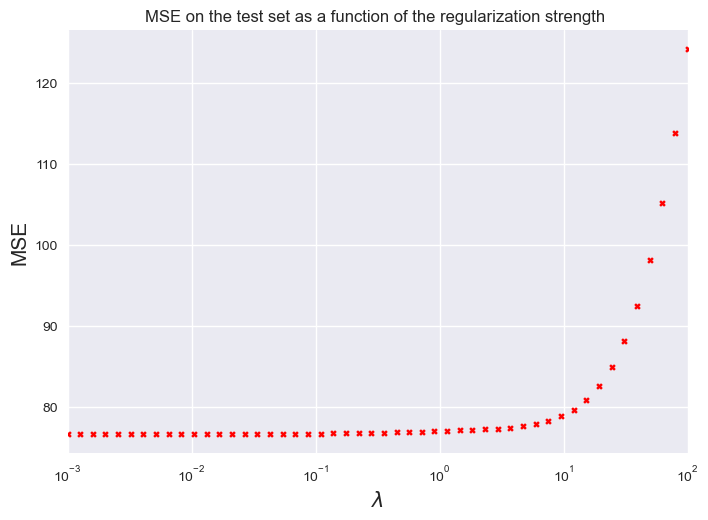

In [13]:
# regularization strength
# define a range of values for the regularization strength
alphas = np.logspace(-3, 2, 50)
np.logspace(-3,2,50)
mse_alphas = np.zeros(len(alphas))
i=0
for alpha in alphas: 
    krr = KernelRidge(alpha=alpha, kernel='poly', gamma=1, degree=2)
    krr.fit(X_train_scaled,y_train)
    y_pred = krr.predict(X_test_scaled)
    mse_alphas[i] = mean_squared_error(y_test,y_pred)
    i+=1

fig, ax = plt.subplots()
ax.scatter(alphas ,mse_alphas, c='r', s=12, marker='x');
ax.set_xlabel(r'$\lambda$', size=15)
ax.set_ylabel('MSE', size=15)
ax.set_xscale('log')
ax.set_xlim(0.001,100)
plt.title('MSE on the test set as a function of the regularization strength ')
plt.show()

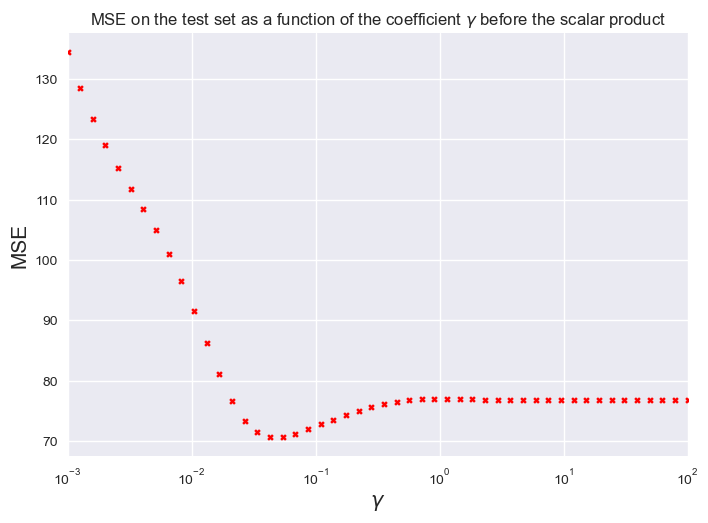

In [14]:
# coefficient before the scalar product
gammas = np.logspace(-3,2,50)
mse_gammas = np.zeros(len(gammas))
i=0
for gamma in gammas: 
    krr = KernelRidge(alpha=1, kernel='poly', gamma=gamma, degree=2)
    krr.fit(X_train_scaled,y_train)
    y_pred = krr.predict(X_test_scaled)
    mse_gammas[i] = mean_squared_error(y_test,y_pred)
    i+=1

fig, ax = plt.subplots()
ax.scatter(gammas,mse_gammas, c='r', s=12, marker='x');
ax.set_xlabel(r'$\gamma$', size=15)
ax.set_ylabel('MSE', size=15)
ax.set_xscale('log')
ax.set_xlim(0.001,100)
plt.title('MSE on the test set as a function of the coefficient $\gamma$ before the scalar product')
plt.show()


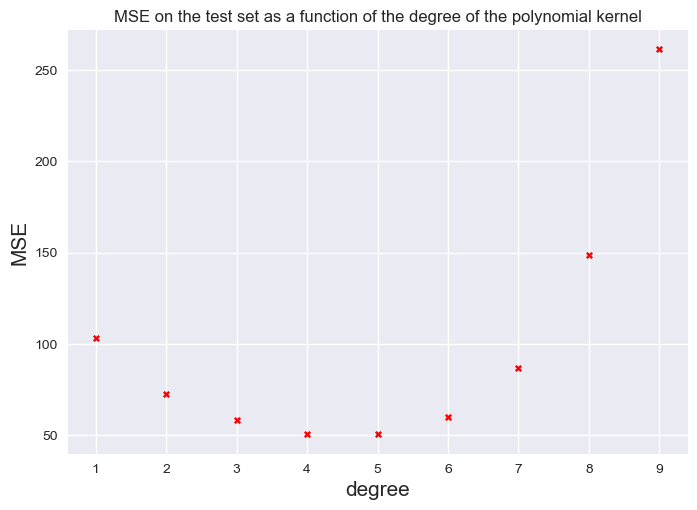

In [15]:
# degree of the polynomial kernel
degrees = np.arange(1,10)
mse_degrees = np.zeros(len(degrees))
i=0
for degree in degrees: 
    krr = KernelRidge(alpha=1, kernel='poly', gamma=0.1, degree=degree)
    krr.fit(X_train_scaled,y_train)
    y_pred = krr.predict(X_test_scaled)
    mse_degrees[i] = mean_squared_error(y_test,y_pred)
    i+=1

fig, ax = plt.subplots()
ax.scatter(degrees,mse_degrees, c='r', s=15, marker='x');
ax.set_xlabel('degree', size=15)
ax.set_ylabel('MSE', size=15)
plt.title('MSE on the test set as a function of the degree of the polynomial kernel')
plt.show()